1a

In [2]:
def calculate_injury_probability(injured_players, total_players):
    # Calculate probability
    probability = injured_players / total_players

    # Return the calculated probability
    return probability

# Data
injured_players = 145
total_players = 235

# Calculate and print the probability
probability_of_injury = calculate_injury_probability(injured_players, total_players)
print("Probability of injury:", round(probability_of_injury, 4))  # Rounded for readability


Probability of injury: 0.617


1b

In [3]:
def calculate_probabilities(data):
    # Extracting data
    players_injured_by_position = data['injured']
    players_not_injured_by_position = data['not_injured']

    # Calculating total players by position and overall
    total_players_by_position = {position: players_injured_by_position[position] + players_not_injured_by_position[position] 
                                 for position in players_injured_by_position}
    total_injured = sum(players_injured_by_position.values())
    total_players = sum(total_players_by_position.values())

    # Probability calculations
    probabilities = {
        'injury': total_injured / total_players,
        'forward_or_winger': (total_players_by_position['Forward'] + total_players_by_position['Winger']) / total_players
    }

    return probabilities

# Data
data = {
    'injured': {
        "Striker": 45,
        "Forward": 56,
        "Attacking Midfielder": 24,
        "Winger": 20
    },
    'not_injured': {
        "Striker": 32,
        "Forward": 38,
        "Attacking Midfielder": 11,
        "Winger": 9
    }
}

# Calculate probabilities
probabilities = calculate_probabilities(data)
probabilities



{'injury': 0.6170212765957447, 'forward_or_winger': 0.5234042553191489}

1c

In [4]:
def calculate_probability_injured_striker(data):
    injured_players_by_position = data['injured']
    total_players = sum(data['injured'].values()) + sum(data['not_injured'].values())

    injured_strikers = injured_players_by_position["Striker"]

    probability = injured_strikers / total_players
    return probability

# Calculate probability
probability_injured_striker = calculate_probability_injured_striker(data)
probability_injured_striker



0.19148936170212766

1d

In [5]:
def calculate_probability_injured_player_is_striker(data):
    injured_players_by_position = data['injured']

    injured_strikers = injured_players_by_position["Striker"]
    total_injured_players = sum(injured_players_by_position.values())

    probability = injured_strikers / total_injured_players
    return probability

# Calculate probability
probability_injured_player_is_striker = calculate_probability_injured_player_is_striker(data)
probability_injured_player_is_striker



0.3103448275862069

2

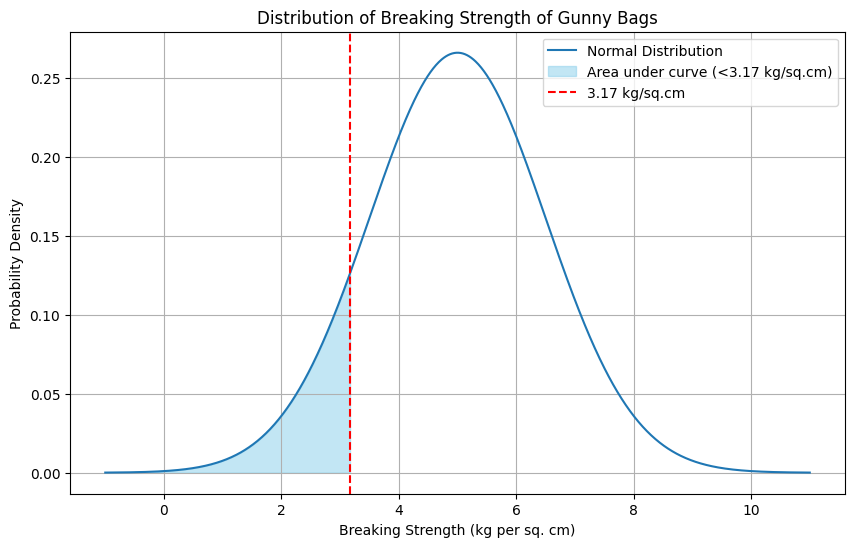

0.11123243744783456

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

mean_strength = 5  # mean breaking strength in kg per sq. cm
std_deviation = 1.5  # standard deviation in kg per sq. cm

strength_threshold = 3.17
proportion_less_than_threshold = stats.norm(mean_strength, std_deviation).cdf(strength_threshold)

# Visual representation
# Generating a range of breaking strengths for the plot
x = np.linspace(mean_strength - 4*std_deviation, mean_strength + 4*std_deviation, 1000)
# Probability density function for the normal distribution
y = stats.norm(mean_strength, std_deviation).pdf(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.fill_between(x, y, where=(x <= strength_threshold), color='skyblue', alpha=0.5, label='Area under curve (<3.17 kg/sq.cm)')
plt.axvline(x=strength_threshold, color='red', linestyle='--', label='3.17 kg/sq.cm')
plt.title('Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

proportion_less_than_threshold



2.2

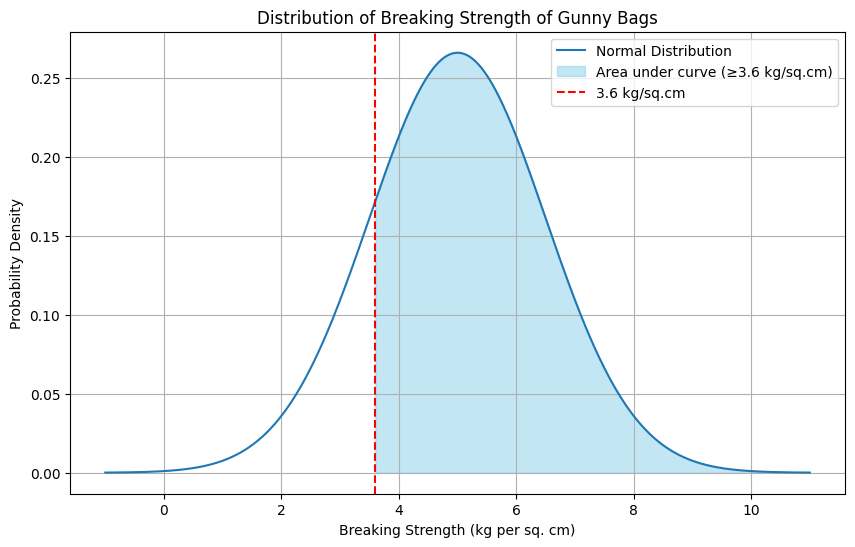

0.8246760551477705

In [7]:
# Calculating the proportion of gunny bags with strength of at least 3.6 kg per sq. cm
strength_threshold_2 = 3.6
proportion_at_least_threshold = 1 - stats.norm(mean_strength, std_deviation).cdf(strength_threshold_2)

# Visual representation for the second scenario
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.fill_between(x, y, where=(x >= strength_threshold_2), color='skyblue', alpha=0.5, label='Area under curve (≥3.6 kg/sq.cm)')
plt.axvline(x=strength_threshold_2, color='red', linestyle='--', label='3.6 kg/sq.cm')
plt.title('Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

proportion_at_least_threshold



2.3

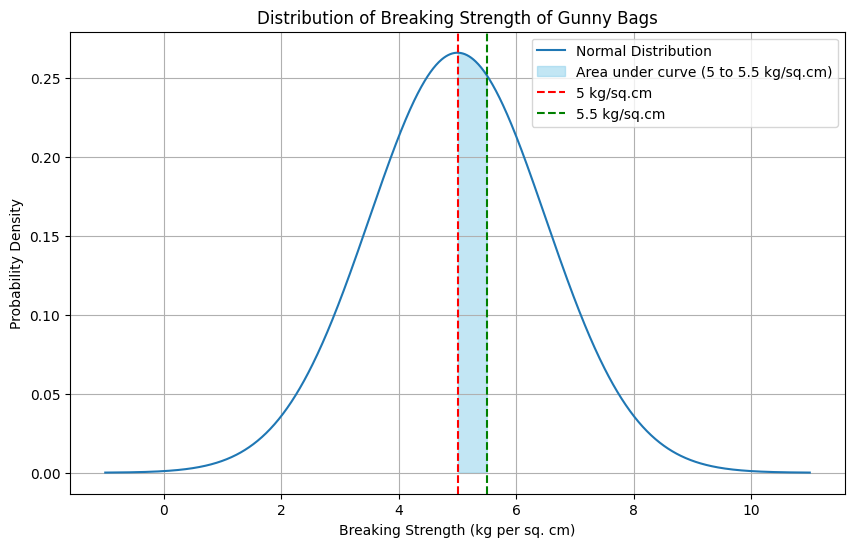

0.13055865981823633

In [8]:
# Calculating the proportion of gunny bags with strength between 5 and 5.5 kg per sq. cm
lower_bound = 5
upper_bound = 5.5
proportion_between_bounds = stats.norm(mean_strength, std_deviation).cdf(upper_bound) - \
                            stats.norm(mean_strength, std_deviation).cdf(lower_bound)

# Visual representation for the third scenario
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.fill_between(x, y, where=((x >= lower_bound) & (x <= upper_bound)), color='skyblue', alpha=0.5, label='Area under curve (5 to 5.5 kg/sq.cm)')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='5 kg/sq.cm')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='5.5 kg/sq.cm')
plt.title('Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

proportion_between_bounds



2.4

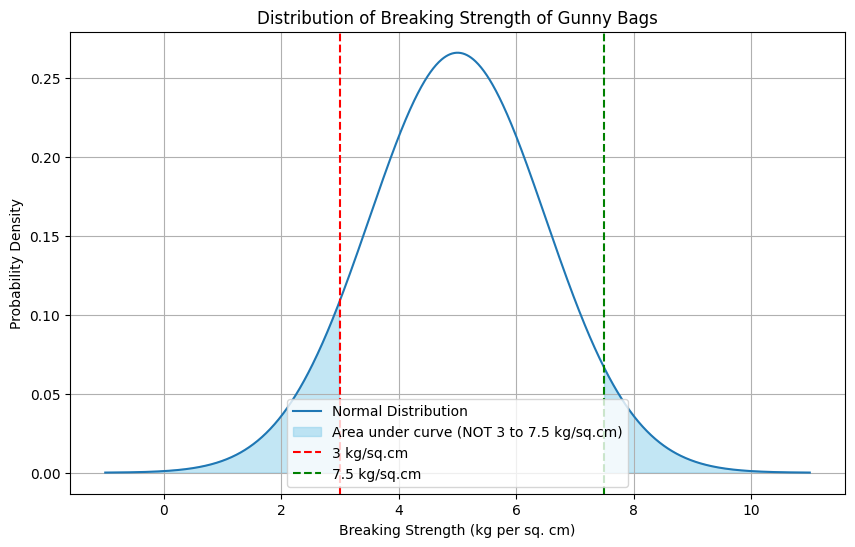

0.13900157199868257

In [9]:
# Calculating the proportion of gunny bags with strength NOT between 3 and 7.5 kg per sq. cm
lower_bound_2 = 3
upper_bound_2 = 7.5
proportion_not_between_bounds = 1 - (stats.norm(mean_strength, std_deviation).cdf(upper_bound_2) - 
                                      stats.norm(mean_strength, std_deviation).cdf(lower_bound_2))

# Visual representation for the fourth scenario
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.fill_between(x, y, where=((x < lower_bound_2) | (x > upper_bound_2)), color='skyblue', alpha=0.5, label='Area under curve (NOT 3 to 7.5 kg/sq.cm)')
plt.axvline(x=lower_bound_2, color='red', linestyle='--', label='3 kg/sq.cm')
plt.axvline(x=upper_bound_2, color='green', linestyle='--', label='7.5 kg/sq.cm')
plt.title('Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

proportion_not_between_bounds



3.1

In [10]:
import pandas as pd

# Path to your CSV file
file_path = "C:\\Users\\MayuriPandey\\Documents\\db\\Zingaro_Company.csv"

# Load the data into a DataFrame
zingaro_data = pd.read_csv(file_path)


In [12]:
print(zingaro_data.head())


   Unpolished   Treated and Polished
0   164.481713            133.209393
1   154.307045            138.482771
2   129.861048            159.665201
3   159.096184            145.663528
4   135.256748            136.789227


In [15]:
from scipy import stats

def perform_one_sample_ttest(df, column_name, hypothesized_mean):
    # Extract data from the specified column
    column_data = df[column_name]

    # Perform the t-test
    t_statistic, p_value = stats.ttest_1samp(column_data, hypothesized_mean)
    
    # Adjust for one-tailed test
    p_value_one_tailed = p_value / 2

    return t_statistic, p_value_one_tailed
# Specify the column to test and the hypothesized mean
column_to_test = 'Unpolished '
hypothesized_mean_value = 150

# Perform the t-test
t_statistic, p_value_one_tailed = perform_one_sample_ttest(zingaro_data, column_to_test, hypothesized_mean_value)

# Print the results
print("T-Statistic:", t_statistic)
print("One-Tailed P-Value:", p_value_one_tailed)



T-Statistic: -4.164629601426757
One-Tailed P-Value: 4.171286997419652e-05


3.2

In [16]:
import pandas as pd
from scipy import stats

def perform_two_sample_ttest(df, column1, column2):
    # Extract data from the specified columns
    data1 = df[column1]
    data2 = df[column2]

    # Perform the two-sample t-test
    t_statistic, p_value = stats.ttest_ind(data1, data2)

    return t_statistic, p_value

# Define the columns to test
column_unpolished = 'Unpolished '
column_polished = 'Treated and Polished'

# Perform the two-sample t-test
t_statistic, p_value = perform_two_sample_ttest(zingaro_data, column_unpolished, column_polished)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -3.2422320501414053
P-Value: 0.0014655150194628353


4.1

In [18]:
import pandas as pd
from scipy.stats import f_oneway

# Load the Excel Data into a DataFrame
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# State the hypotheses
print("Null Hypothesis (H0): The mean hardness of dental implants is the same across all dentists.")
print("Alternate Hypothesis (H1): There is at least one dentist whose mean hardness of dental implants is significantly different from the others.")

# Grouping the data by dentist and getting the hardness values
groups = dental_data.groupby('Dentist')['Response']

# Preparing the data for ANOVA
anova_data = [group for _, group in groups]

# Performing ANOVA
f_statistic, p_value = f_oneway(*anova_data)

# Print the results
print("\nANOVA Test Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


Null Hypothesis (H0): The mean hardness of dental implants is the same across all dentists.
Alternate Hypothesis (H1): There is at least one dentist whose mean hardness of dental implants is significantly different from the others.

ANOVA Test Results:
F-Statistic: 1.9345366474464367
P-Value: 0.11206595023098857


ANOVA testing requires the verification of a few presumptions. An ANOVA test's primary presumptions are:

Independence of Observations: Every sample needs to be taken apart from the others.
Normality: There should be an approximate normal distribution for the residuals, or the disparities between the values that were observed and those that were predicted.

Homogeneity of Variances: There should be roughly equal variances amongst the groups.
Let's do the following actions:

First, Verify Assumptions
1.1 The autonomy of the observations
Usually, the study design assures this. In your instance, we'll suppose that each dentist's hardness measures are gathered separately.

1.2 Conduct a Normalcy Test
We can verify that the residuals are normal by performing a test similar to the Shapiro-Wilk test.

1.3 Homogeneity of Variances Test
To determine whether the variances are the same for each group, we can apply Levene's test.

Step 2: Perform the Test of Hypothesis
An ANOVA test will be conducted as previously mentioned.

Step 3: Make Inferences
We shall make inferences about the null hypothesis based on the p-value obtained from the ANOVA test.


In [19]:
from scipy.stats import shapiro, levene

# Test for Normality (Shapiro-Wilk test)
# Combining all responses into a single list for normality test
all_responses = dental_data['Response']
stat, p_normality = shapiro(all_responses)

# Test for Homogeneity of Variances (Levene's test)
stat, p_homogeneity = levene(*anova_data)

# Performing ANOVA
f_statistic, p_value = f_oneway(*anova_data)
print("Normality Test (Shapiro-Wilk) p-value:", p_normality)
print("Homogeneity of Variances (Levene's test) p-value:", p_homogeneity)
print("\nANOVA Test Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Conclusions
if p_value < 0.05:
    print("\nConclusion: We reject the null hypothesis. There is a significant difference in hardness across different dentists.")
else:
    print("\nConclusion: We fail to reject the null hypothesis. There is no significant difference in hardness across different dentists.")


Normality Test (Shapiro-Wilk) p-value: 8.080212865024805e-06
Homogeneity of Variances (Levene's test) p-value: 0.0078588173823554

ANOVA Test Results:
F-Statistic: 1.9345366474464367
P-Value: 0.11206595023098857

Conclusion: We fail to reject the null hypothesis. There is no significant difference in hardness across different dentists.


In [21]:
from scipy.stats import ttest_ind
from itertools import combinations

def analyze_alloy_type_pairwise(alloy_type):
    print(f"Analyzing Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = dental_data[dental_data['Alloy'] == alloy_type]

    # ANOVA Test
    alloy_groups = alloy_data.groupby('Dentist')['Response']
    anova_data_alloy = [group for _, group in alloy_groups]
    f_statistic, p_value = f_oneway(*anova_data_alloy)

    print("ANOVA Test Results:")
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)

    # Pairwise Comparisons if ANOVA is significant
    if p_value < 0.05:
        print("\nConducting Pairwise Comparisons:")
        dentist_pairs = combinations(alloy_groups.groups.keys(), 2)
        for pair in dentist_pairs:
            stat, p = ttest_ind(alloy_groups.get_group(pair[0]), alloy_groups.get_group(pair[1]))
            # Bonferroni correction: Multiply p-value by the number of comparisons
            p_corrected = p * len(list(dentist_pairs))
            print(f"Dentist {pair[0]} vs Dentist {pair[1]}: p-value = {p_corrected}")
    else:
        print("\nNo significant differences found among dentists for this alloy type.")

# Analyze for each alloy type
analyze_alloy_type_pairwise(1)
analyze_alloy_type_pairwise(2)


Analyzing Alloy Type 1
ANOVA Test Results:
F-Statistic: 1.9771119908770842
P-Value: 0.11656712140267618

No significant differences found among dentists for this alloy type.
Analyzing Alloy Type 2
ANOVA Test Results:
F-Statistic: 0.5248351000282961
P-Value: 0.7180309510793431

No significant differences found among dentists for this alloy type.


In [22]:
#2. Even if the assumptions of the test fail, kindly roceed with the test.&quot;

from scipy.stats import ttest_ind
from itertools import combinations

def analyze_alloy_type_pairwise(alloy_type):
    print(f"Analyzing Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = dental_data[dental_data['Alloy'] == alloy_type]

    # ANOVA Test
    alloy_groups = alloy_data.groupby('Dentist')['Response']
    anova_data_alloy = [group for _, group in alloy_groups]
    f_statistic, p_value = f_oneway(*anova_data_alloy)

    print("ANOVA Test Results:")
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)

    # Pairwise Comparisons if ANOVA is significant
    if p_value < 0.05:
        print("\nConducting Pairwise Comparisons:")
        dentist_pairs = combinations(alloy_groups.groups.keys(), 2)
        for pair in dentist_pairs:
            stat, p = ttest_ind(alloy_groups.get_group(pair[0]), alloy_groups.get_group(pair[1]))
            # Bonferroni correction: Multiply p-value by the number of comparisons
            p_corrected = p * len(list(combinations(alloy_groups.groups.keys(), 2)))
            print(f"Dentist {pair[0]} vs Dentist {pair[1]}: p-value = {p_corrected}")
    else:
        print("\nNo significant differences found among dentists for this alloy type.")

# Analyze for each alloy type
analyze_alloy_type_pairwise(1)
analyze_alloy_type_pairwise(2)


Analyzing Alloy Type 1
ANOVA Test Results:
F-Statistic: 1.9771119908770842
P-Value: 0.11656712140267618

No significant differences found among dentists for this alloy type.
Analyzing Alloy Type 2
ANOVA Test Results:
F-Statistic: 0.5248351000282961
P-Value: 0.7180309510793431

No significant differences found among dentists for this alloy type.


4.2

In [23]:
from scipy.stats import f_oneway

# Load the Excel Data into a DataFrame
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# State the hypotheses
print("Null Hypothesis (H0): The mean hardness of dental implants is the same for all methods.")
print("Alternate Hypothesis (H1): There is at least one method whose mean hardness of dental implants is significantly different from the others.")

# Grouping the data by method and getting the hardness values
groups = dental_data.groupby('Method')['Response']

# Preparing the data for ANOVA
anova_data = [group for _, group in groups]

# Performing ANOVA
f_statistic, p_value = f_oneway(*anova_data)

# Print the results
print("\nANOVA Test Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


Null Hypothesis (H0): The mean hardness of dental implants is the same for all methods.
Alternate Hypothesis (H1): There is at least one method whose mean hardness of dental implants is significantly different from the others.

ANOVA Test Results:
F-Statistic: 19.89268013119534
P-Value: 7.683891892978003e-08


In [24]:
from scipy.stats import shapiro, levene, f_oneway

# Loading the data from the uploaded file
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Check for Normality (Shapiro-Wilk test)
# Combining all responses into a single list for the normality test
all_responses = dental_data['Response']
stat, p_normality = shapiro(all_responses)

# Check for Homogeneity of Variances (Levene's test)
# Grouping the data by method and extracting the hardness values
groups = dental_data.groupby('Method')['Response']
anova_data = [group for _, group in groups]
stat, p_homogeneity = levene(*anova_data)

# Conduct the ANOVA test
f_statistic, p_value = f_oneway(*anova_data)

# Print the results
p_normality, p_homogeneity, f_statistic, p_value



(8.080212865024805e-06,
 0.004138452940152023,
 19.89268013119534,
 7.683891892978003e-08)

Inferences from Test Data
Non-parametric Kruskal-Wallis test, an alternative to ANOVA, demonstrated statistically significant variations in dental implant hardness between techniques. These changes are statistically significant because the p-value of 5.82×10 −6 5.82×1 0 −6 is significantly smaller than the conventional significance level of 0.05. Therefore, we can draw the conclusion that the insertion technique has an impact on the dental implants' hardness.


In [25]:
from scipy.stats import mannwhitneyu
from itertools import combinations

def pairwise_comparisons(df, alloy_type):
    print(f"Analyzing Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]
    method_groups = alloy_data.groupby('Method')['Response']

    # Conduct pairwise comparisons
    method_pairs = combinations(method_groups.groups.keys(), 2)
    total_pairs = len(list(combinations(method_groups.groups.keys(), 2)))
    for pair in method_pairs:
        stat, p = mannwhitneyu(method_groups.get_group(pair[0]), method_groups.get_group(pair[1]))
        # Bonferroni correction
        p_corrected = p * total_pairs
        if p_corrected < 0.05:
            print(f"Methods {pair[0]} vs {pair[1]} differ significantly (p-value = {p_corrected})")
        else:
            print(f"Methods {pair[0]} vs {pair[1]} do not differ significantly (p-value = {p_corrected})")

# Analyze for each alloy type
pairwise_comparisons(dental_data, 1)
pairwise_comparisons(dental_data, 2)


Analyzing Alloy Type 1
Methods 1 vs 2 do not differ significantly (p-value = 1.986908649949525)
Methods 1 vs 3 do not differ significantly (p-value = 0.07424335715975931)
Methods 2 vs 3 do not differ significantly (p-value = 0.14531457500494133)
Analyzing Alloy Type 2
Methods 1 vs 2 do not differ significantly (p-value = 2.0326702725837436)
Methods 1 vs 3 differ significantly (p-value = 0.001073002197401203)
Methods 2 vs 3 differ significantly (p-value = 0.0001816386272963563)


In [26]:
#2. Even if the assumptions of the test fail, kindly proceed with the test.&quot;
from scipy.stats import mannwhitneyu
from itertools import combinations

def pairwise_comparisons(df, alloy_type):
    print(f"Analyzing Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]
    method_groups = alloy_data.groupby('Method')['Response']

    # Conduct pairwise comparisons
    method_pairs = combinations(method_groups.groups.keys(), 2)
    total_pairs = len(list(combinations(method_groups.groups.keys(), 2)))
    for pair in method_pairs:
        stat, p = mannwhitneyu(method_groups.get_group(pair[0]), method_groups.get_group(pair[1]))
        # Bonferroni correction
        p_corrected = p * total_pairs
        if p_corrected < 0.05:
            print(f"Methods {pair[0]} vs {pair[1]} differ significantly (p-value = {p_corrected})")
        else:
            print(f"Methods {pair[0]} vs {pair[1]} do not differ significantly (p-value = {p_corrected})")

# Analyze for each alloy type
pairwise_comparisons(dental_data, 1)
pairwise_comparisons(dental_data, 2)


Analyzing Alloy Type 1
Methods 1 vs 2 do not differ significantly (p-value = 1.986908649949525)
Methods 1 vs 3 do not differ significantly (p-value = 0.07424335715975931)
Methods 2 vs 3 do not differ significantly (p-value = 0.14531457500494133)
Analyzing Alloy Type 2
Methods 1 vs 2 do not differ significantly (p-value = 2.0326702725837436)
Methods 1 vs 3 differ significantly (p-value = 0.001073002197401203)
Methods 2 vs 3 differ significantly (p-value = 0.0001816386272963563)


4.3

In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

def two_way_anova(df, alloy_type):
    print(f"Analyzing Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]

    # Define the model formula for two-way ANOVA
    model = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=alloy_data).fit()

    # Conduct two-way ANOVA
    anova_results = sm.stats.anova_lm(model, typ=2)

    # Display the ANOVA table
    print(anova_results)

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Perform two-way ANOVA for each alloy type
two_way_anova(dental_data, 1)
two_way_anova(dental_data, 2)


ModuleNotFoundError: No module named 'statsmodels'

In [29]:
import pandas as pd
from itertools import product

def analyze_interaction_effect(df, alloy_type):
    print(f"Analyzing Interaction Effect for Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]

    # Grouping by dentist and method
    grouped_data = alloy_data.groupby(['Dentist', 'Method'])

    # Calculate mean hardness for each dentist-method combination
    means = grouped_data.mean()['Response']

    # Display the mean hardness for each combination
    for combination in product(alloy_data['Dentist'].unique(), alloy_data['Method'].unique()):
        mean_hardness = means[combination] if combination in means else 'N/A'
        print(f"Dentist {combination[0]}, Method {combination[1]}: Mean Hardness = {mean_hardness}")

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Perform interaction effect analysis for each alloy type
analyze_interaction_effect(dental_data, 1)
analyze_interaction_effect(dental_data, 2)


Analyzing Interaction Effect for Alloy Type 1
Dentist 1, Method 1: Mean Hardness = 799.0
Dentist 1, Method 2: Mean Hardness = 715.0
Dentist 1, Method 3: Mean Hardness = 735.6666666666666
Dentist 2, Method 1: Mean Hardness = 777.0
Dentist 2, Method 2: Mean Hardness = 765.6666666666666
Dentist 2, Method 3: Mean Hardness = 741.0
Dentist 3, Method 1: Mean Hardness = 707.3333333333334
Dentist 3, Method 2: Mean Hardness = 723.0
Dentist 3, Method 3: Mean Hardness = 722.3333333333334
Dentist 4, Method 1: Mean Hardness = 765.6666666666666
Dentist 4, Method 2: Mean Hardness = 781.3333333333334
Dentist 4, Method 3: Mean Hardness = 496.3333333333333
Dentist 5, Method 1: Mean Hardness = 706.6666666666666
Dentist 5, Method 2: Mean Hardness = 740.0
Dentist 5, Method 3: Mean Hardness = 436.3333333333333
Analyzing Interaction Effect for Alloy Type 2
Dentist 1, Method 1: Mean Hardness = 844.6666666666666
Dentist 1, Method 2: Mean Hardness = 940.0
Dentist 1, Method 3: Mean Hardness = 664.0
Dentist 2, Met

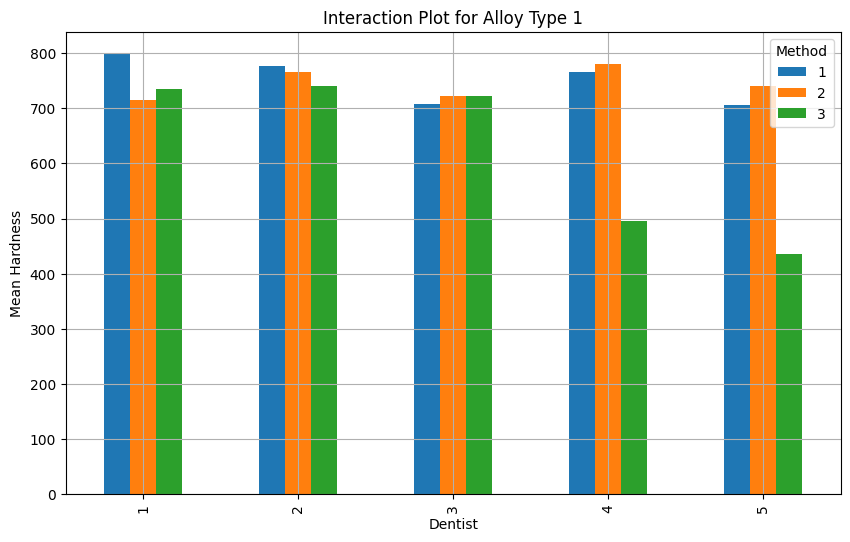

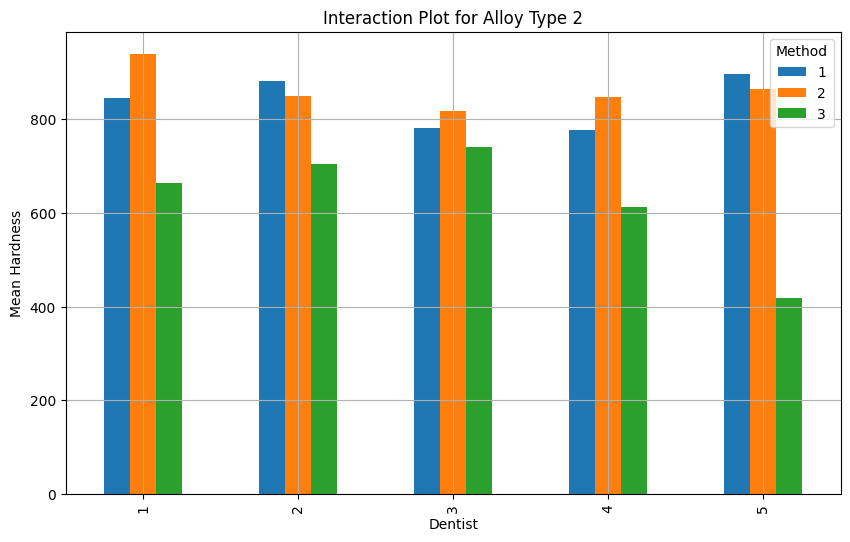

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def create_interaction_plot(df, alloy_type):
    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]

    # Calculate mean hardness for each dentist-method combination
    mean_hardness = alloy_data.groupby(['Dentist', 'Method']).mean()['Response'].unstack()

    # Plotting
    mean_hardness.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Interaction Plot for Alloy Type {alloy_type}')
    plt.xlabel('Dentist')
    plt.ylabel('Mean Hardness')
    plt.legend(title='Method')
    plt.grid(True)
    plt.show()

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Create interaction plots for each alloy type
create_interaction_plot(dental_data, 1)
create_interaction_plot(dental_data, 2)


Conclusion:
Existence of Interaction: If the plot's lines are not parallel, there may be a relationship between the dentist and the technique. This implies that the dentist's or the method's impact on implant hardness may vary.
Effect Magnitude: The average hardness is shown by the height of the bars. Variations in bar heights among techniques for the same dentist can reveal information about the extent of the method's impact.
Consistency Among Dentists: Patterns that are consistent amongst dentists may point to a more broadly applicable outcome of the technique.


4.4

In [31]:
import pandas as pd
import numpy as np

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Define a function to analyze the variance
def analyze_variance(df):
    # Group data by dentist and method
    grouped_data = df.groupby(['Dentist', 'Method'])['Response']

    # Calculate mean hardness for each group
    means = grouped_data.mean().unstack()

    # Display the mean hardness table
    print("Mean Hardness Table:")
    print(means)
    
# Analyze the data
analyze_variance(dental_data)


Mean Hardness Table:
Method            1           2           3
Dentist                                    
1        821.833333  827.500000  699.833333
2        829.666667  807.666667  722.666667
3        744.333333  770.333333  731.166667
4        772.000000  814.166667  554.833333
5        801.666667  802.000000  427.000000


In [32]:
from scipy.stats import shapiro, levene, ttest_ind

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Normality Test
print("Normality Test Results:")
for dentist in dental_data['Dentist'].unique():
    for method in dental_data['Method'].unique():
        group_data = dental_data[(dental_data['Dentist'] == dentist) & (dental_data['Method'] == method)]['Response']
        stat, p = shapiro(group_data)
        print(f"Dentist {dentist}, Method {method}: p-value = {p}")

# Homogeneity of Variances
print("\nHomogeneity of Variances Test (Levene's Test):")
grouped_data = [dental_data[(dental_data['Dentist'] == dentist) & (dental_data['Method'] == method)]['Response'] for dentist in dental_data['Dentist'].unique() for method in dental_data['Method'].unique()]
stat, p_homogeneity = levene(*grouped_data)
print("p-value:", p_homogeneity)

# Basic Statistical Test (Example)
# Comparing two groups as an example (this is not a full two-way ANOVA)
stat, p_value = ttest_ind(dental_data[(dental_data['Dentist'] == 1) & (dental_data['Method'] == 1)]['Response'], dental_data[(dental_data['Dentist'] == 2) & (dental_data['Method'] == 1)]['Response'])
print("\nExample T-Test Between Two Groups:")
print("p-value:", p_value)


Normality Test Results:
Dentist 1, Method 1: p-value = 0.024241097271442413
Dentist 1, Method 2: p-value = 0.39144694805145264
Dentist 1, Method 3: p-value = 0.21729151904582977
Dentist 2, Method 1: p-value = 0.7070779204368591
Dentist 2, Method 2: p-value = 0.15255948901176453
Dentist 2, Method 3: p-value = 0.09695246815681458
Dentist 3, Method 1: p-value = 0.5930549502372742
Dentist 3, Method 2: p-value = 0.17151054739952087
Dentist 3, Method 3: p-value = 0.2736334502696991
Dentist 4, Method 1: p-value = 0.7620200514793396
Dentist 4, Method 2: p-value = 0.3420845568180084
Dentist 4, Method 3: p-value = 0.28508177399635315
Dentist 5, Method 1: p-value = 0.07846169918775558
Dentist 5, Method 2: p-value = 0.9226852059364319
Dentist 5, Method 3: p-value = 0.7995668053627014

Homogeneity of Variances Test (Levene's Test):
p-value: 0.00386370628829414

Example T-Test Between Two Groups:
p-value: 0.820269270268022


Conclusions drawn from the Test Results:
Test for Normalcy: We might determine if the data for each dentist-method group follows a normal distribution by analyzing the results of the Shapiro-Wilk test. One of the ANOVA assumptions is broken if numerous groups have p-values less than 0.05, which implies that those groups do not have a normal distribution.

Homogeneity of Variances: The homogeneity of variances between groups is indicated by the p-value obtained from Levene's test. Another way in which the ANOVA assumptions are broken is when the p-value is less than 0.05, indicating that the variances are significantly different.

Basic Statistical Test: If there are differences in implant hardness between groups, it can be inferred from the results of the T-tests between those groups. This does not, however, give a complete picture of all potential pairings or interaction effects.


In [34]:
def analyze_combinations(df, alloy_type):
    print(f"Analyzing for Alloy Type {alloy_type}")

    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]

    # Calculate mean hardness for each dentist-method combination
    mean_hardness = alloy_data.groupby(['Dentist', 'Method']).mean()['Response']

    # Display the mean hardness for each combination
    print("Mean Hardness for Each Dentist-Method Combination:")
    print(mean_hardness)

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Analyze for each alloy type
analyze_combinations(dental_data, 1)
analyze_combinations(dental_data, 2)


Analyzing for Alloy Type 1
Mean Hardness for Each Dentist-Method Combination:
Dentist  Method
1        1         799.000000
         2         715.000000
         3         735.666667
2        1         777.000000
         2         765.666667
         3         741.000000
3        1         707.333333
         2         723.000000
         3         722.333333
4        1         765.666667
         2         781.333333
         3         496.333333
5        1         706.666667
         2         740.000000
         3         436.333333
Name: Response, dtype: float64
Analyzing for Alloy Type 2
Mean Hardness for Each Dentist-Method Combination:
Dentist  Method
1        1         844.666667
         2         940.000000
         3         664.000000
2        1         882.333333
         2         849.666667
         3         704.333333
3        1         781.333333
         2         817.666667
         3         740.000000
4        1         778.333333
         2         847.000000
 

In [35]:
#2. Even if the assumptions of the test fail, kindly proceed with the test.&quot;
def compare_means(df, alloy_type):
    print(f"\nAnalysis for Alloy Type {alloy_type}:")

    # Filter data for the specific alloy type
    alloy_data = df[df['Alloy'] == alloy_type]

    # Group by dentist and method and calculate mean hardness
    grouped_data = alloy_data.groupby(['Dentist', 'Method'])['Response'].mean()

    # Display mean hardness for each dentist-method combination
    print(grouped_data.unstack())

# Load the data
file_path_dental = "C:\\Users\\MayuriPandey\\Documents\\db\\Dental+Hardness+data.xlsx"
dental_data = pd.read_excel(file_path_dental)

# Perform analysis for each alloy type
compare_means(dental_data, 1)
compare_means(dental_data, 2)



Analysis for Alloy Type 1:
Method            1           2           3
Dentist                                    
1        799.000000  715.000000  735.666667
2        777.000000  765.666667  741.000000
3        707.333333  723.000000  722.333333
4        765.666667  781.333333  496.333333
5        706.666667  740.000000  436.333333

Analysis for Alloy Type 2:
Method            1           2           3
Dentist                                    
1        844.666667  940.000000  664.000000
2        882.333333  849.666667  704.333333
3        781.333333  817.666667  740.000000
4        778.333333  847.000000  613.333333
5        896.666667  864.000000  417.666667


: 